## Principal Component Analysis



Principal Component Analysis (PCA) is a method of dimensionality reduction. It is an unsupervised technique, meaning it does not require labels to perform. 

PCA reduces dimensionality of a dataset by projecting variance into principal components. The first principal component will have most of the explained variance, the second principal component will have the second most of the explained variance, and so long. The advantage of using PCA is particularly evident in collinear data, as correlated features will be reduced into uncorrelated principal components. However, with the use of principal components, information about variable importance in a model will be lost. 

In [90]:
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split

#visualization
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

To test out PCA for both visualization and dimensionality reduction, the breast cancer dataset from sci-kit learn will be used. This dataset contains 30 numerical predictor variables. The goal of this dataset is binary classification (determine if the breast cancer is benign or not) using the numerical features.

In [102]:
X = pd.DataFrame(datasets.load_breast_cancer()['data'])
X.columns = pd.DataFrame(datasets.load_breast_cancer()['feature_names'])
y = datasets.load_breast_cancer()['target']
X.head()

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)",...,"(worst radius,)","(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)"
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualization with PCA

PCA reduces a multi-dimensional dataset to several principal components. Reducing to three principal components allows for visualization in a 3D scatter plot. Points on the scatter plot are color coded by target variable; the two groups are able to be separated into distinct clusters on the plot.

Text(0.5, 0.92, 'PCA Classification Visualization')

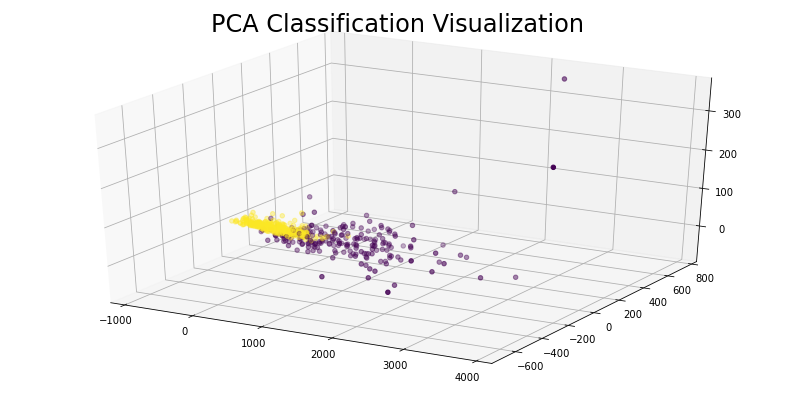

In [89]:
palette = sns.color_palette('deep', np.unique(y).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in y]
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X)
X = pca.transform(X)
fig = plt.figure()
fig.set_size_inches(14, 7, forward=True)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[ : , 0], X[ : , 1], X[ : , 2], c=y)
plt.title('PCA Classification Visualization', fontsize=24)

### Scree Plot

To determine the amount of principal components to use, a scree plot can be used. A scree plot shows the amount of variance explained by each principal components. The elbow in the plot shows the ideal amount of principal comonents for the dataset - for this data, the elbow can be found at 3 components.

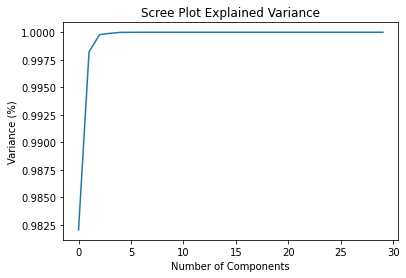

In [100]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Scree Plot Explained Variance')
plt.show()

### Classification Models

After transforming the data into three principal components, different classication models can be fit and evaluated. For this data, the Random Forest and Logistic Regression algorithms provide the best results. These algorithms have the highest accuracy and F1 scores.

In [98]:
models = []
models.append(('Logistic Regression', 
               LogisticRegression(solver='liblinear', class_weight='balanced')))
models.append(('Random Forest', 
               RandomForestClassifier(n_estimators=100, max_depth = 15)))
models.append(('SVM', 
               SVC(gamma='auto')))
models.append(('KNN', 
               KNeighborsClassifier()))
models.append(('Decision Tree Classifier', 
               DecisionTreeClassifier()))
models.append(('Gaussian NB', 
               GaussianNB()))
models.append(('Ada Boost Classifier', 
               AdaBoostClassifier(n_estimators=100, learning_rate=0.5)))
models.append(('Gradient Boosting Classifier', 
               GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1)))
models.append(('Ridge Regression', 
               RidgeClassifier(alpha=0.01)))

def classification_eval_PCA(X, y, components):
    print("PCA Components: " + str(components))
    pca = PCA(n_components = components, svd_solver='full')
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    acc_results = []
    auc_results = []
    no_bank_rel_precision = []
    bank_rel_precision = []
    no_bank_rel_recall = []
    bank_rel_recall = []
    no_bank_rel_f1 = []
    bank_rel_f1 = []
    names = []
    # set table to table to populate with performance results
    col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
           'Accuracy Mean', 'Accuracy STD','Precision (0)','Precision (1)',
           'Recall (0)','Recall (1)',
           'F1 (0)','F1 (1)']
    df_results = pd.DataFrame(columns=col)
    i = 0
    # evaluate each model using cross-validation
    for name, model in models:
        kfold = model_selection.KFold(
            n_splits=10, random_state=42)  # 10-fold cross-validation

        cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
            model, X_train, y_train, cv=kfold, scoring='accuracy')

        cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
            model, X_train, y_train, cv=kfold, scoring='roc_auc')

        model.fit(X_train, y_train)  
        predictions = model.predict(X_test)
        report = classification_report(y_test,predictions, output_dict = True)

        no_bank_rel_precision = (report['0']['precision'])
        bank_rel_precision = (report['1']['precision'])
        no_bank_rel_recall = (report['0']['recall'])
        bank_rel_recall = (report['1']['recall'])
        no_bank_rel_f1 = (report['0']['f1-score'])
        bank_rel_f1 = (report['1']['f1-score'])

        acc_results.append(cv_acc_results)
        auc_results.append(cv_auc_results)
        names.append(name)
        df_results.loc[i] = [name,
                             round(cv_auc_results.mean()*100, 2),
                             round(cv_auc_results.std()*100, 2),
                             round(cv_acc_results.mean()*100, 2),
                             round(cv_acc_results.std()*100, 2),
                             no_bank_rel_precision,
                             bank_rel_precision,
                             no_bank_rel_recall,
                             bank_rel_recall,
                             no_bank_rel_f1,
                             bank_rel_f1
                             ]
        i += 1
    
    return(df_results.sort_values(by=['Accuracy Mean'], ascending=False))

classification_eval_PCA(X, y, 3)

PCA Components: 3


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1)
3,KNN,94.79,3.92,92.76,2.94,0.925000,0.945946,0.902439,0.958904,0.913580,0.952381
6,Ada Boost Classifier,96.39,2.21,92.75,3.57,0.923077,0.933333,0.878049,0.958904,0.900000,0.945946
7,Gradient Boosting Classifier,97.46,1.59,92.75,4.73,0.926829,0.958904,0.926829,0.958904,0.926829,0.958904
1,Random Forest,97.48,1.89,92.31,3.45,0.950000,0.959459,0.926829,0.972603,0.938272,0.965986
0,Logistic Regression,97.91,1.51,92.09,3.97,0.906977,0.971831,0.951220,0.945205,0.928571,0.958333
5,Gaussian NB,95.61,2.62,89.68,4.16,0.864865,0.883117,0.780488,0.931507,0.820513,0.906667
4,Decision Tree Classifier,88.86,5.05,89.01,5.30,0.923077,0.933333,0.878049,0.958904,0.900000,0.945946
8,Ridge Regression,96.52,2.08,87.49,4.72,0.964286,0.837209,0.658537,0.986301,0.782609,0.905660
2,SVM,76.57,5.95,62.39,6.03,0.000000,0.640351,0.000000,1.000000,0.000000,0.780749


### Sources

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python